## Data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('deliveries.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [ ]:
df["match_id"] = df["match_id"].astype("category")
df["inning"] = df["inning"].astype("category")
df["over"] = df["over"].astype("category")
df["ball"] = df["ball"].astype("category")
df["is_wicket"] = df["is_wicket"].astype(bool)

### Standardizing team names

In [ ]:
team_replacements = {
    "Delhi Daredevils": "Delhi Capitals",
    "Deccan Chargers": "Sunrisers Hyderabad"
}
df["batting_team"] = df["batting_team"].replace(team_replacements)
df["bowling_team"] = df["bowling_team"].replace(team_replacements)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
cleaned_file_path = "deliveries_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to deliveries_cleaned.csv


In [ ]:
df=pd.read_csv('deliveries_cleaned.csv')

In [ ]:
df["player_dismissed"].fillna("Not Out", inplace=True)
df["dismissal_kind"].fillna("Not Applicable", inplace=True)
df["fielder"].fillna("Not Applicable", inplace=True)

In [ ]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Analysis

#### Top run scorers

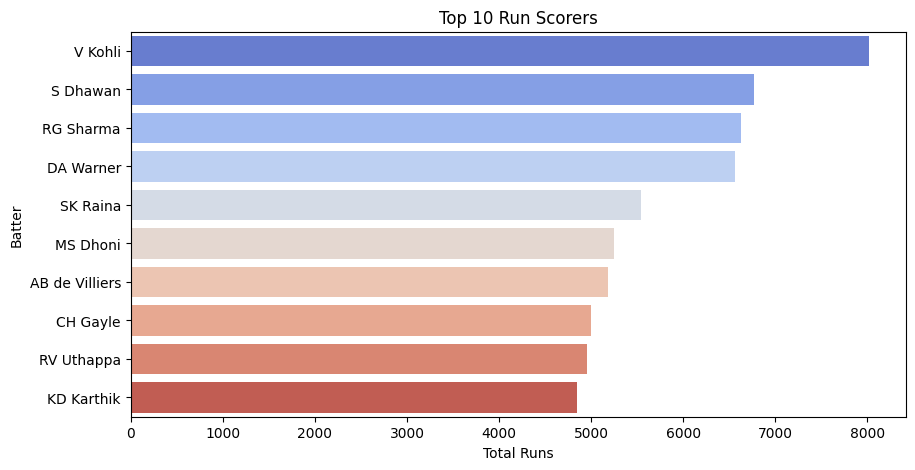

In [ ]:
top_scorers = df.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="coolwarm")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.title("Top 10 Run Scorers")
plt.show()


###Team Performance: Which team scores the most runs per match on average?

In [ ]:
avg_runs_per_team = df.groupby('batting_team')['total_runs'].mean().reset_index()
avg_runs_per_team.columns = ['Team', 'Average Runs']
avg_runs_per_team.sort_values(by='Average Runs', ascending=False, inplace=True)
avg_runs_per_team


,Team,Average Runs
15,Royal Challengers Bengaluru,1.611661
3,Gujarat Titans,1.411904
10,Punjab Kings,1.395580
7,Lucknow Super Giants,1.390741
2,Gujarat Lions,1.363432
0,Chennai Super Kings,1.348260
8,Mumbai Indians,1.341604
14,Royal Challengers Bangalore,1.336359
6,Kolkata Knight Riders,1.332622
4,Kings XI Punjab,1.327563


###Bowling & Wickets Analysis: Which bowlers take the most wickets in powerplays vs. death overs?

In [ ]:
#Bowling & Wickets Analysis: Which bowlers take the most wickets in powerplays vs. death overs?
powerplay_wickets = df[(df['over'] >= 1) & (df['over'] <= 6) & df['player_dismissed'].notna()]
top_powerplay_bowler = powerplay_wickets['bowler'].value_counts().idxmax()
top_powerplay_bowler





'B Kumar'

In [ ]:
death_over_wickets = df[(df['over'] >= 16) & (df['over'] <= 20) & df['player_dismissed'].notna()]
top_death_over_bowler = death_over_wickets['bowler'].value_counts().idxmax()
top_death_over_bowler

'B Kumar'

###What is the strike rate trend across different over phases (Powerplay, Middle, Death Overs)?

In [ ]:
# Strike rate trend across different phases
def calculate_strike_rate(df):
  return (df['total_runs'].sum() / len(df)) * 100

powerplay_strike_rate = calculate_strike_rate(df[(df['over'] >= 1) & (df['over'] <= 6)])
middle_overs_strike_rate = calculate_strike_rate(df[(df['over'] >= 7) & (df['over'] <= 15)])
death_overs_strike_rate = calculate_strike_rate(df[(df['over'] >= 16) & (df['over'] <= 20)])

print("Strike Rate Trend:")
print(f"Powerplay (1-6): {powerplay_strike_rate:.2f}")
print(f"Middle Overs (7-15): {middle_overs_strike_rate:.2f}")
print(f"Death Overs (16-20): {death_overs_strike_rate:.2f}")

Strike Rate Trend:
Powerplay (1-6): 128.18
Middle Overs (7-15): 129.68
Death Overs (16-20): 161.88


### What are the most common modes of dismissal for batters?

In [ ]:
dismissal_counts = df['dismissal_kind'].value_counts()
print("Most common modes of dismissal:")
dismissal_counts

Most common modes of dismissal:


,count
dismissal_kind,
Not Applicable,247970
caught,8063
bowled,2212
run out,1114
lbw,800
caught and bowled,367
stumped,358
retired hurt,15
hit wicket,15


### Which team has scored most run in whole Ipl

In [ ]:
team_runs = df.groupby("batting_team")["total_runs"].sum().reset_index()

# Sort by total runs in descending order
team_runs = team_runs.sort_values(by="total_runs", ascending=False)
team_runs

,batting_team,total_runs
8,Mumbai Indians,42176
16,Sunrisers Hyderabad,40534
6,Kolkata Knight Riders,39331
1,Delhi Capitals,39196
0,Chennai Super Kings,38629
14,Royal Challengers Bangalore,37692
11,Rajasthan Royals,34747
4,Kings XI Punjab,30064
10,Punjab Kings,9536
3,Gujarat Titans,7757


Text(0.5, 1.0, 'Total Runs Scored by Each Team')

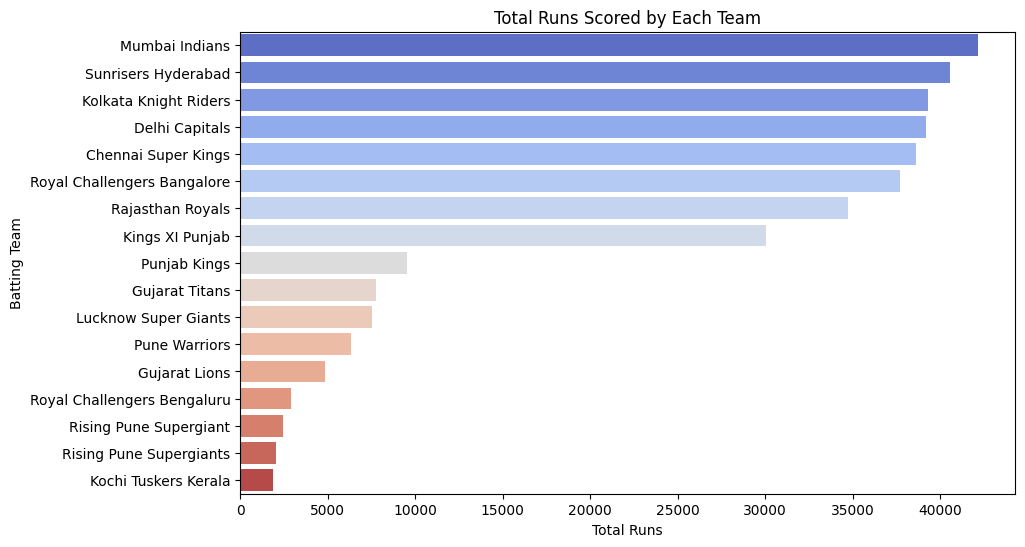

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="total_runs", y="batting_team", data=team_runs, palette="coolwarm")
plt.xlabel("Total Runs")
plt.ylabel("Batting Team")
plt.title("Total Runs Scored by Each Team")

### Top wicket taker in Ipl

In [ ]:
top_bowlers = bowler_wickets.sort_values(by="total_wickets", ascending=False).head(10)
top_bowlers

,bowler,total_wickets
449,YS Chahal,213
104,DJ Bravo,207
301,PP Chawla,201
383,SP Narine,200
308,R Ashwin,198
63,B Kumar,195
376,SL Malinga,188
7,A Mishra,183
171,JJ Bumrah,182
323,RA Jadeja,169


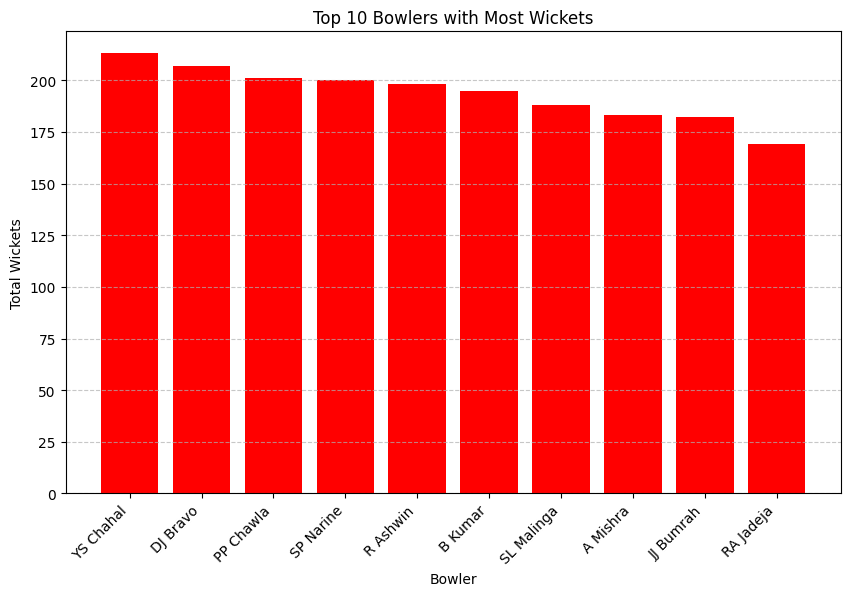

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_bowlers["bowler"], top_bowlers["total_wickets"], color='red')
plt.xlabel("Bowler")
plt.ylabel("Total Wickets")
plt.title("Top 10 Bowlers with Most Wickets")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()